Problem Statement CApstone Project 1 Ecommerce Amazon Shopping

Amazon is an online shopping website that now caters to millions of people everywhere. Over 34,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided. 
The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted.
You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.

Week 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_data_path = r'D:\OneDrive\Knowledge Center\AI - ML\Masters in Artifical Engineer\Deep Learning with Keras and Tensorflow\Notebooks\Ecommerce\train_data.csv'
test_data_path = r'D:\OneDrive\Knowledge Center\AI - ML\Masters in Artifical Engineer\Deep Learning with Keras and Tensorflow\Notebooks\Ecommerce\test_data.csv'
test_prediction_path = r'D:\OneDrive\Knowledge Center\AI - ML\Masters in Artifical Engineer\Deep Learning with Keras and Tensorflow\Notebooks\Ecommerce\test_data_hidden.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
test_prediction = pd.read_csv(test_prediction_path)

Perform an EDA on the dataset.

In [2]:
# Display the first few rows of the train data
print(train_data.head())

                                                name   brand  \
0  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...  Amazon   
1        Amazon - Echo Plus w/ Built-In Hub - Silver  Amazon   
2  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
3  Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...  Amazon   
4  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...  Amazon   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Amazon Echo,Smart Home,Networking,Home & Tools...   
2  Amazon Echo,Virtual Assistant Speakers,Electro...   
3  eBook Readers,Fire Tablets,Electronics Feature...   
4  Computers/Tablets & Networking,Tablets & eBook...   

             primaryCategories              reviews.date  \
0                  Electronics  2016-12-26T00:00:00.000Z   
1         Electronics,Hardware  2018-01-17T00:00:00.000Z   
2         Electronics,Hardware  2017-12-20T00:00:00.000Z   
3  Office Supplies,Electronics  2017-0

In [3]:
# Get the summary statistics of the train data
print(train_data.describe())

                                                     name   brand  \
count                                                4000    4000   
unique                                                 23       1   
top     Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
freq                                                  676    4000   

                                               categories primaryCategories  \
count                                                4000              4000   
unique                                                 23                 4   
top     Electronics,iPad & Tablets,All Tablets,Fire Ta...       Electronics   
freq                                                  628              2600   

                    reviews.date  \
count                       4000   
unique                       638   
top     2017-01-23T00:00:00.000Z   
freq                          99   

                                             reviews.text reviews.title  \
co

In [4]:
# Check for missing values in the train data
print(train_data.isnull().sum())

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64


In [5]:
#Instead of dropping null values train_data = train_data.dropna() filling it up with mean. DO the same with test data
# fill null values with mean
# fill missing values in numeric columns with mean
for col in train_data.select_dtypes(include=['int64', 'float64']).columns:
    train_data[col] = train_data[col].fillna(train_datan[col].mean())

# fill missing values in non-numeric columns with most frequent value
for col in train_data.select_dtypes(exclude=['int64', 'float64']).columns:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

In [6]:
# Check for missing values in the train data
print(train_data.isnull().sum())

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        0
sentiment            0
dtype: int64


In [7]:
# Display the first few rows of the test data
print(test_data.head())

                                                name   brand  \
0  Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...  Amazon   
1  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
2  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...  Amazon   
3  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...  Amazon   
4  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   

                                          categories     primaryCategories  \
0  Fire Tablets,Computers/Tablets & Networking,Ta...           Electronics   
1  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   
2  Electronics,iPad & Tablets,All Tablets,Fire Ta...           Electronics   
3  Computers/Tablets & Networking,Tablets & eBook...           Electronics   
4  Computers,Amazon Echo,Virtual Assistant Speake...  Electronics,Hardware   

               reviews.date  \
0  2016-05-23T00:00:00.000Z   
1  2018-01-02T00:00:00.000Z   
2  2017-01-02T00:00:00.000Z   
3  2017-03-25T00:00:00

In [8]:
# Get the summary statistics of the test data
print(test_data.describe())

                                                     name   brand  \
count                                                1000    1000   
unique                                                 23       1   
top     Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
freq                                                  169    1000   

                                               categories primaryCategories  \
count                                                1000              1000   
unique                                                 23                 4   
top     Electronics,iPad & Tablets,All Tablets,Fire Ta...       Electronics   
freq                                                  169               676   

                    reviews.date  \
count                       1000   
unique                       366   
top     2017-01-23T00:00:00.000Z   
freq                          26   

                                             reviews.text reviews.title  
cou

In [9]:
# Check for missing values in the test data
print(test_data.isnull().sum())

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
dtype: int64


In [10]:
#Instead of dropping null values train_data = train_data.dropna() filling it up with mean. DO the same with test data
# fill null values with mean
# fill missing values in numeric columns with mean
for col in test_data.select_dtypes(include=['int64', 'float64']).columns:
    test_data[col] = test_data[col].fillna(test_data[col].mean())

In [11]:
# fill missing values in non-numeric columns with most frequent value
for col in test_data.select_dtypes(exclude=['int64', 'float64']).columns:
    test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

In [12]:
# Check for missing values in the test data
print(test_data.isnull().sum())

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        0
dtype: int64


In [13]:
# Select columns containing categorical data
categorical_columns = train_data.select_dtypes(include=['object']).columns

print("Categorical columns in the DataFrame:")
for column in categorical_columns:
    print(column)

#not required 
#print("\nUnique values in each categorical column:")
#for column in categorical_columns:
#    print(f"{column}: {train_data[column].unique()}")

Categorical columns in the DataFrame:
name
brand
categories
primaryCategories
reviews.date
reviews.text
reviews.title
sentiment


In [14]:
train_data.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


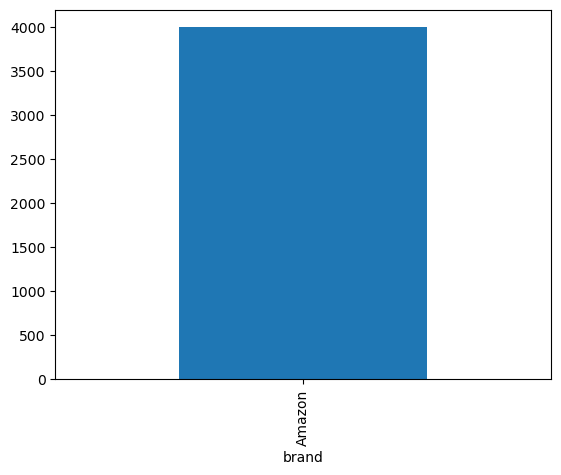

In [15]:
#there are no numberica column so cant make historgram. Using bar chart
train_data['brand'].value_counts().plot(kind='bar')
plt.show()

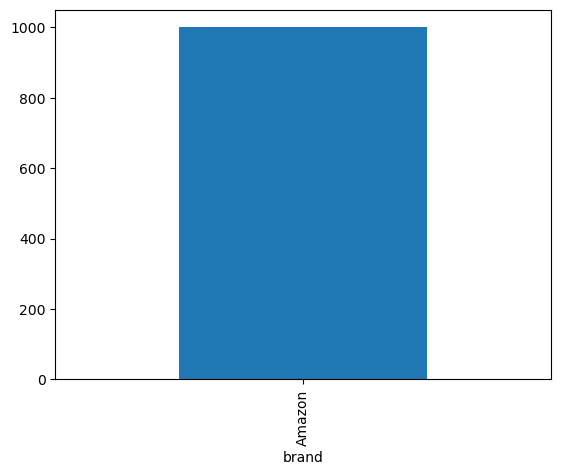

In [16]:
# For test_data
test_data['brand'].value_counts().plot(kind='bar')
plt.show()

In [17]:
# Not Check for infinity, does not have numeric columns so not checking for outliers, corellation an
import numpy as np

# Check for NaN
if train_data.isnull().values.any():
    print("DataFrame contains NaN values. . REmoving them")
    train_data.dropna(inplace=True)  # drop NaN values

C:\Users\naseh\AppData\Local\Temp\ipykernel_17072\532171164.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


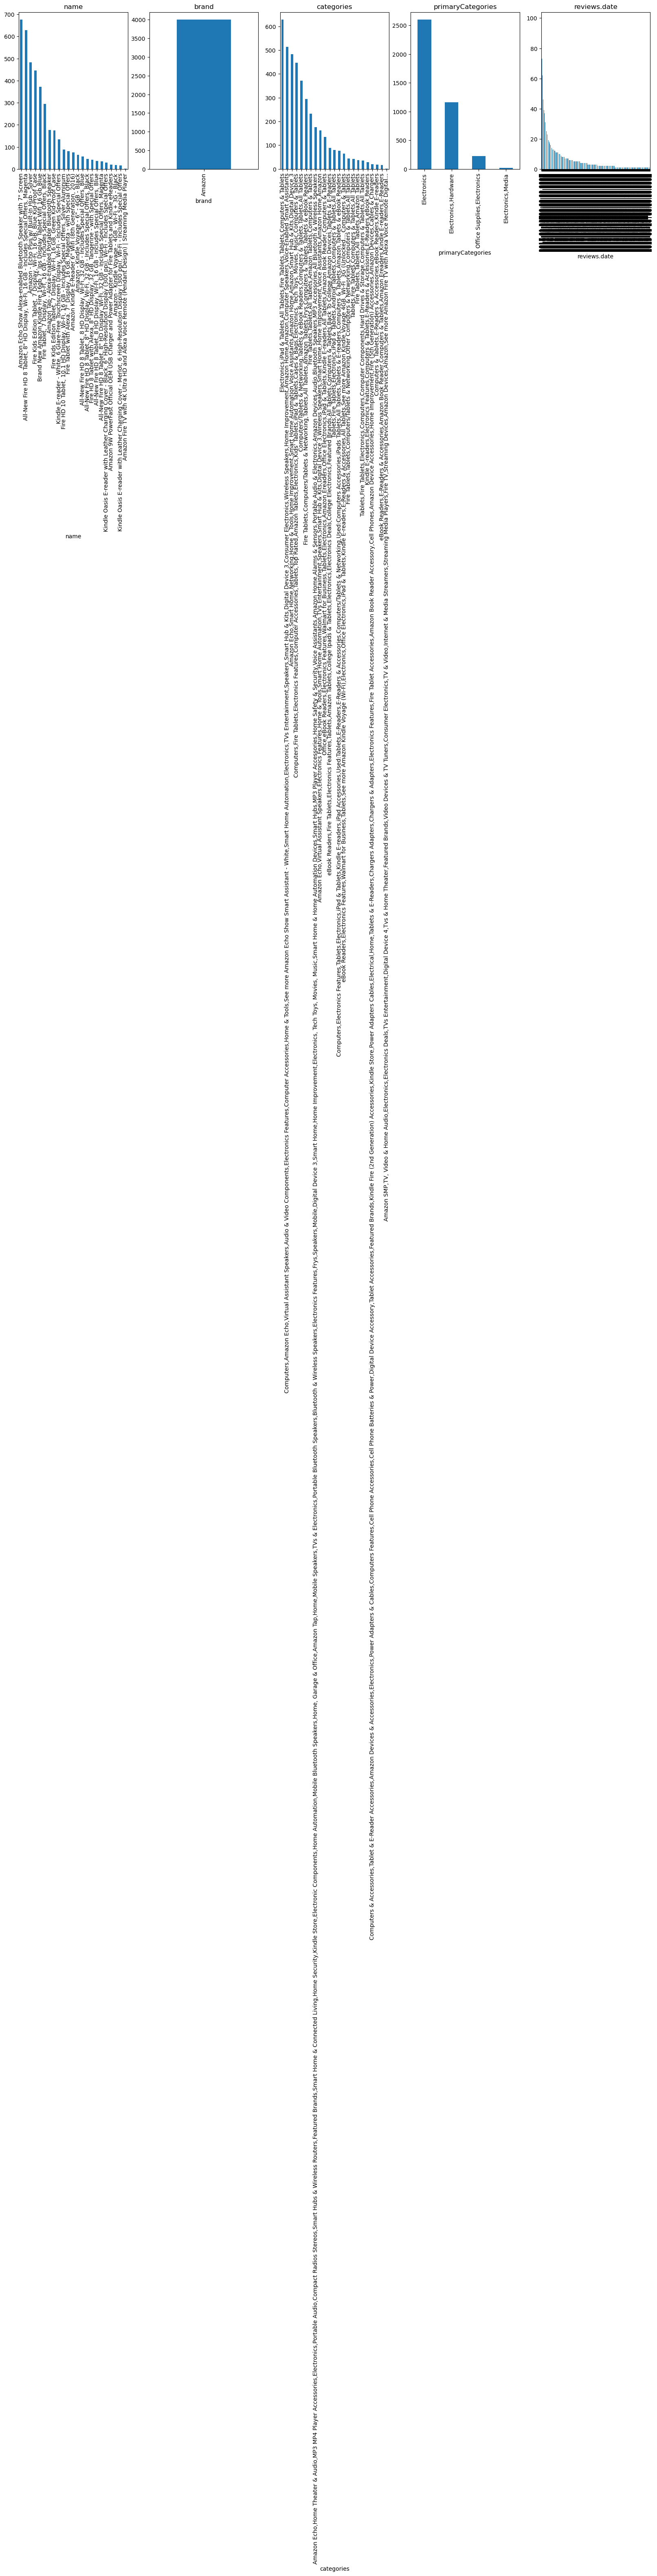

In [18]:
# For categorical columns
# Get categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# Plot bar graphs
for i, col in enumerate(categorical_cols[:5]):
    train_data[col].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

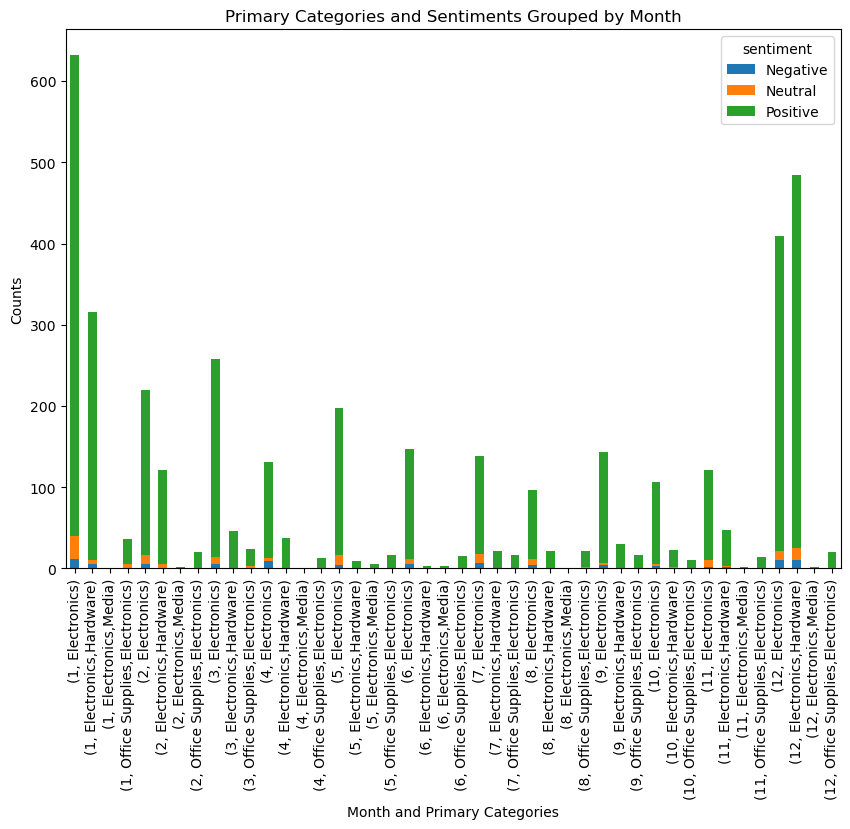

In [19]:
# Convert 'reviews.date' to datetime format
train_data['reviews.date'] = pd.to_datetime(train_data['reviews.date'])

# Create a new column for the month
train_data['month'] = train_data['reviews.date'].dt.month

# Group by 'month', 'primaryCategories', and 'sentiment'
grouped = train_data.groupby(['month', 'primaryCategories', 'sentiment']).size().reset_index(name='counts')

# Pivot the data for plotting
pivot_table = grouped.pivot_table(index=['month', 'primaryCategories'], columns='sentiment', values='counts').fillna(0)

# Plot stacked bar graph
pivot_table.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Primary Categories and Sentiments Grouped by Month')
plt.xlabel('Month and Primary Categories')
plt.ylabel('Counts')
plt.show()

In [20]:
print(train_data.describe(include='all'))  # Descriptive statistics for all columns

                                                     name   brand  \
count                                                4000    4000   
unique                                                 23       1   
top     Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
freq                                                  676    4000   
mean                                                  NaN     NaN   
min                                                   NaN     NaN   
25%                                                   NaN     NaN   
50%                                                   NaN     NaN   
75%                                                   NaN     NaN   
max                                                   NaN     NaN   
std                                                   NaN     NaN   

                                               categories primaryCategories  \
count                                                4000              4000   
unique       

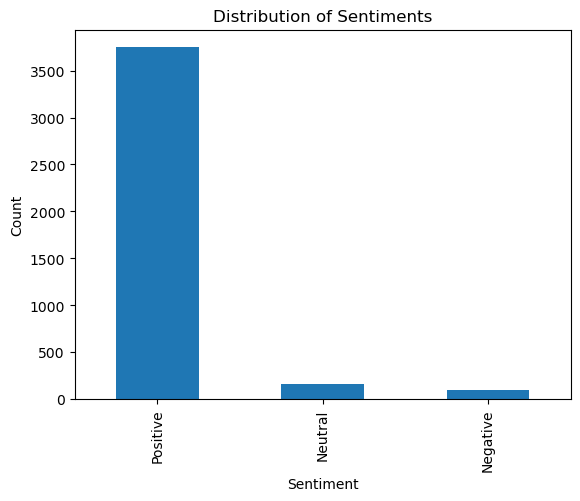

In [21]:
# Plot the distribution of sentiments
train_data['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [22]:
train_data['sentiment'].value_counts()

sentiment
Positive    3749
Neutral      158
Negative      93
Name: count, dtype: int64

Cleaning the reviews. NLP prepprocessing. nltk.download('wordnet') and nltk.download('stopwords'): These lines download the WordNet lexical database and a list of common English words that are usually ignored in text processing, known as “stopwords”.

wordnet_lemmatizer = WordNetLemmatizer(): This creates an instance of the WordNet Lemmatizer. Lemmatization is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form.

tokenizer = RegexpTokenizer(r'[a-z]+'): This creates a tokenizer that matches any text composed of one or more lowercase letters. Tokenization is the process of breaking down text into words, phrases, symbols, or other meaningful elements called tokens.

stop_words = set(stopwords.words('english')): This creates a set of English stop
def preprocess(document): This defines a function to preprocess a document. The function does the following:

Converts the document to lowercase.
Tokenizes the document into words.
Removes stopwords from the list of words.
Lemmatizes the words. It does this for different parts of speech: nouns, verbs, adjectives, and adverbs.
Joins the words back into a string, with spaces in between, and returns this preprocessed document.words.

In [23]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#Download Stopwords
nltk.download('stopwords')

wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = tokenizer.tokenize(document) # Tokenize
    words = [w for w in words if not w in stop_words] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

print('done')

done


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\naseh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naseh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Keeping only those Features that we need for further exploring.
data1 = train_data [["sentiment","reviews.text"]]
data1.head()
# Resetting the Index.
data1.index = pd.Series(list(range(data1.shape[0])))
print('Shape : ',data1.shape)
data1.head()
data1['Processed_Review'] = data1['reviews.text'].apply(preprocess)
data1.head()
data1.groupby('sentiment').describe()

Shape :  (4000, 2)


C:\Users\naseh\AppData\Local\Temp\ipykernel_17072\3159730150.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Processed_Review'] = data1['reviews.text'].apply(preprocess)


reviews.text         \
                 count unique   
sentiment                       
Negative            93     78   
Neutral            158    146   
Positive          3749   3374   

                                                                   \
                                                         top freq   
sentiment                                                           
Negative   The last 2 models of Kindle HDX 8 have been te...    3   
Neutral    Just an average Alexa option. Does show a few ...    2   
Positive   I bought this kindle for my 11yr old granddaug...    4   

          Processed_Review         \
                     count unique   
sentiment                           
Negative                93     78   
Neutral                158    145   
Positive              3749   3372   

                                                                   
                                                         top freq  
sentiment                                                          
Negative   last model kindle hdx terrible purchase model ...    3  
Neutral    average alexa option show thing screen still l...    2  
Positive   buy kindle yr old granddaughter christmas husb...    4

top: This is the most common (mode) processed review for each sentiment. The most common negative review is “last model kindle hdx terrible purchase model …”, the most common neutral review is “average alexa option show thing screen still l…”, and the most common positive review is “buy kindle yr old granddaughter christmas husb…”.

freq: This is the frequency of the most common processed review for each sentiment. The most common negative review appears 3 times, the most common neutral review appears 2 times, and the most common positive review appears 4 time

applies the textPreprocessing function to each of the selected entries. The textPreprocessing function takes a document (in this case, a processed review), removes punctuation from it, splits it into words, and removes stopwords. It returns a list of the remaining words.s.

In [25]:
data1.shape

(4000, 3)

In [26]:
data2 = data1 [["sentiment","Processed_Review"]]
data2.head()

,sentiment,Processed_Review
0,Positive,purchase black fridaypros great price even sal...
1,Positive,purchase two amazon echo plus two dot plus fou...
2,Neutral,average alexa option show thing screen still l...
3,Positive,good product exactly want good price
4,Positive,rd one purchase buy one niece case compare one...


This function is typically used after the previous preprocessing function. While the previous function tokenizes the text, removes stopwords, and lemmatizes the words, this function removes punctuation and stopwords again. This might be done to ensure that all punctuation and stopwords are removed, in case the previous function missed some. 

handling class imbalance before you converting  text data into numerical vectors (like Bag of Words or TF-IDF). This is because techniques like SMOTE work on numerical data, not directly on text data.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer().fit(data1['Processed_Review'])
print(len(bow.vocabulary_))
reviews_bow=bow.transform(data1['Processed_Review'])

3397


In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfData=TfidfTransformer().fit(reviews_bow)
tfidfData_reviews=tfidfData.transform(reviews_bow)

In [29]:
print(tfidfData_reviews.shape, data2.shape)

(4000, 3397) (4000, 2)


In [30]:
reviews_bow = bow.transform(data2['Processed_Review'])

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfData = TfidfTransformer().fit(reviews_bow)
tfidfDataFinal = tfidfData.transform(reviews_bow)
tfidfDataFinal.shape

(4000, 3397)

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(data2['sentiment'])

Correcting the imbalance
Resampling Techniques: You can oversample the minority class, undersample the majority class, or do a combination of both. This can be done randomly or by using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling).

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Fit and transform the vectorizer on the text data
#X = vectorizer.fit_transform(data2['Processed_Review'])
# Apply SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(tfidfDataFinal, y)

In [35]:
from collections import Counter
print(sorted(Counter(y_sm).items()))

[(0, 3749), (1, 3749), (2, 3749)]


In [36]:
# Number of features
num_features = len(bow.get_feature_names_out())
# Feature names
feature_names = bow.get_feature_names_out()
# Print the number of features
print("Number of features: ", num_features)
# Print some feature names
print("Some feature names: ", feature_names[:27])  # Adjust the number as needed

Number of features:  3397
Some feature names:  ['abc' 'ability' 'able' 'absent' 'absolute' 'absolutely' 'absorb' 'abuse'
 'accelerometer' 'accent' 'accept' 'acceptable' 'access' 'accessible'
 'accessory' 'accident' 'accidentally' 'accidently' 'accommodate'
 'accompany' 'accomplish' 'account' 'accurate' 'accustom' 'acoustic'
 'acquaint' 'acquire']


In [37]:
# Fit the CountVectorizer and TfidfTransformer on your training data

# Train your model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_sm, y_sm)

# Now when predicting, use the same 'bow' and 'tfidfData'
input_data = 'Hate it. It is worse, horrible.'
l1 = preprocess(input_data)
l2 = bow.transform([l1])
l3 = tfidfData.transform(l2)
print(l1, l2, l3)


hate bad horrible   (0, 262)	1
  (0, 1391)	1
  (0, 1449)	1   (0, 1449)	0.6651158731689635
  (0, 1391)	0.5855172892357366
  (0, 262)	0.46345482979975755


In [38]:
# Predict the sentiment
encoded_prediction = model.predict(l3[0])
prediction = model.predict(l3[0])
# Decode the prediction
decoded_prediction = encoder.inverse_transform(encoded_prediction)
print("The predicted sentiment is: ", decoded_prediction[0])

The predicted sentiment is:  Negative


tfidfDataFinal is a matrix where each row corresponds to a document and each column corresponds to a word in the vocabulary. The value in each cell is the tf-idf score of the word in the document. This score represents the importance of a word in a document within the corpus.
TfidfTransformer is used to convert a count matrix to a normalized tf-idf (Term Frequency times Inverse Document Frequency) representation. TfidfTransformer and fits it to the reviews_bow data. The fit method learns the idf vector (global term weights) of the data. tfidfData.transform(reviews_bow): This line transforms the reviews_bow data into tf-idf representation. The transform method scales and normalizes the term frequencies and then multiplies by the learned idf vector to get the tf-idf representation.

In [39]:
from sklearn import metrics

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
#Will test with different models
from sklearn.metrics import precision_score, recall_score, confusion_matrix
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [42]:
#using the SMOT for NB 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
# Fit the classifier
nb_classifier.fit(X_train, y_train)
# Evaluate the model on validaton set
y_pred = nb_classifier.predict(X_test)
modelEvaluation(y_pred)


Accuracy on validation set: 0.9587

Classification report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       748
           1       0.93      0.99      0.96       733
           2       0.99      0.89      0.94       769

    accuracy                           0.96      2250
   macro avg       0.96      0.96      0.96      2250
weighted avg       0.96      0.96      0.96      2250


Confusion Matrix : 
 [[748   0   0]
 [  0 727   6]
 [ 34  53 682]]


In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
# Compute predicted probabilities
y_pred_prob = nb_classifier.predict_proba(X_test)
# Check if it's a binary classification problem
if y_pred_prob.shape[1] > 1:
    # Compute AUROC for each class
    auroc = [roc_auc_score(y_test == i, y_pred_prob[:, i]) for i in range(y_pred_prob.shape[1])]
else:
    # Compute AUROC for binary classification
    auroc = roc_auc_score(y_test, y_pred_prob[:, 0])
print('AUROC: ', auroc)

AUROC:  [0.9997516680077189, 0.9966221836916942, 0.9941592200820273]


 The model learned by the Naive Bayes classifier cannot be used by a Decision Tree or Random Forest classifier because they use different algorithms to learn from the data. On the other hand, a Decision Tree classifier learns a series of questions to ask about the features in order to predict the class, and a Random Forest classifier learns a set of Decision Trees and combines their predictions. witching from a Naive Bayes classifier to a Decision Tree or Random Forest classifier, need to fit the new classifier on the training data so it can learn its own model.not using the data obtained from nb_classifier to make tree-based classification. Instead, you’re using the original training data X_train and y_train to train the tree-based classifiers. This is a standard practice in machine learning.

The classification report shows high precision, recall, and F1-score for all classes (Negative, Neutral, Positive), which suggests that the model is performing well on all classes. The accuracy of the model is also high at 96%.
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to the low false positive rate

Recall (Sensitivity) is the ratio of correctly predicted positive observations to all observations in the actual clas.

The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into accunt.

From these metrics, it appears that the class imbalance issue has been effectively addressed by the SMOTE technique you used earlier. The model is able to classify all classes with high accuracy, suggesting that it’s not biased towards the majori
Using tree based classifiers to see if it is better. ty class

decision tree is a type of model used in machine learning and is often used as the base learner 

In [45]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
# Fit the classifier
dt_classifier.fit(X_train, y_train)
# Evaluate the model on validaton set
y_pred = dt_classifier.predict(X_test)
# Evaluate the predictions
modelEvaluation(y_pred)


Accuracy on validation set: 0.9631

Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       748
           1       0.94      0.99      0.96       733
           2       0.97      0.93      0.95       769

    accuracy                           0.96      2250
   macro avg       0.96      0.96      0.96      2250
weighted avg       0.96      0.96      0.96      2250


Confusion Matrix : 
 [[732   6  10]
 [  0 723  10]
 [ 15  42 712]]


Using Bagging and Boosting techinques:Boosting algorithm, you could consider using Gradient Boosting or XGBoost. These are both boosting algorithms that use decision trees as the base learners, similar to Random Forest, but they train the trees in a sequential manner to correct the errors of the previous trees. Random Forest is a bagging algorithm, not a boosting algorithm.
In a Random Forest, each tree in the ensemble is trained independently on a different bootstrap sample of the data. The final prediction is made by averaging the predictions of all the trees (for regression) or by taking a majority vote (for classification)

Boosting, on the other hand, involves training models in sequence, where each new model is trained to correct the errors made by the existing ensemble of models. The final prediction is a weighted sum of the predictions made by all models in the ensemble.

In [46]:
#Using Random Forest 
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()
# Fit the classifier
rf_classifier.fit(X_train, y_train)
# Evaluate the model on validaton set
y_pred = rf_classifier.predict(X_test)
# Evaluate the predictions
modelEvaluation(y_pred)


Accuracy on validation set: 0.9947

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       748
           1       1.00      0.99      1.00       733
           2       0.99      1.00      0.99       769

    accuracy                           0.99      2250
   macro avg       0.99      0.99      0.99      2250
weighted avg       0.99      0.99      0.99      2250


Confusion Matrix : 
 [[742   0   6]
 [  0 729   4]
 [  0   2 767]]


In [47]:
#Checking with XGBoost
from xgboost import XGBClassifier
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()
# Fit the classifier
xgb_classifier.fit(X_train, y_train)
# Evaluate the model on validaton set
y_pred = xgb_classifier.predict(X_test)
# Evaluate the predictions
modelEvaluation(y_pred)


Accuracy on validation set: 0.9853

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       748
           1       0.98      0.99      0.99       733
           2       0.98      0.98      0.98       769

    accuracy                           0.99      2250
   macro avg       0.99      0.99      0.99      2250
weighted avg       0.99      0.99      0.99      2250


Confusion Matrix : 
 [[739   0   9]
 [  0 726   7]
 [  3  14 752]]


In [48]:
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
# Initialize the base classifier
base_classifier = XGBClassifier()
# Initialize the Bagging classifier
bag_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10)
# Fit the classifier
bag_classifier.fit(X_train, y_train)
# Evaluate the model on validaton set
y_pred = bag_classifier.predict(X_test)
# Evaluate the predictions
modelEvaluation(y_pred)

C:\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Accuracy on validation set: 0.9827

Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       748
           1       0.97      0.99      0.98       733
           2       0.98      0.97      0.97       769

    accuracy                           0.98      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250


Confusion Matrix : 
 [[739   0   9]
 [  0 727   6]
 [  4  20 745]]


In [52]:
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

# Initialize the base classifier
base_classifier = XGBClassifier()

# Initialize the Bagging classifier with 'estimator' instead of 'base_estimator'
bag_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=10)

# Fit the classifier
bag_classifier.fit(X_train, y_train)

# Evaluate the model on validaton set
y_pred = bag_classifier.predict(X_test)

# Evaluate the predictions
modelEvaluation(y_pred)


Accuracy on validation set: 0.9840

Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       748
           1       0.98      0.99      0.98       733
           2       0.98      0.97      0.98       769

    accuracy                           0.98      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250


Confusion Matrix : 
 [[739   0   9]
 [  1 726   6]
 [  3  17 749]]


Week 2. Evaluate against new models: Train and evaluate the new models (multi-class SVM, neural networks, ensemble methods) on the same dataset.
Compare performance: Compare the accuracy, precision, recall, F1-score, and AUC-ROC curve of the Week 1 models against the new modelSentiment Score Engineering:

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Assuming that `data3` is your DataFrame and `Processed_Review` and `sentiment` are your columns
X_train, X_test, y_train, y_test = train_test_split(data3['Processed_Review'], data3['sentiment'], test_size=0.2, random_state=42)

# Define the base learners
base_learners = [
                 ('gb', make_pipeline(TfidfVectorizer(), GradientBoostingClassifier())),
                 ('dt', make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())),
                 ('rf', make_pipeline(TfidfVectorizer(), RandomForestClassifier()))
                ]

# Initialize the Stacking Classifier with the base learners
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), cv=3)

# Fit the classifier to the training data
stacking_classifier.fit(X_train, y_train)

# Evaluate the model on validaton set
y_pred = stacking_classifier.predict(X_test)

# Evaluate the predictions
modelEvaluation(y_pred)



Accuracy on validation set: 0.9550

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.96      1.00      0.98       751
           2       0.75      0.17      0.27        36

    accuracy                           0.95       800
   macro avg       0.90      0.59      0.67       800
weighted avg       0.95      0.95      0.94       800


Confusion Matrix : 
 [[  8   4   1]
 [  0 750   1]
 [  0  30   6]]


These are different models. But I am using the method stacking where predicton of decision tree is used as input for Random Forest and output of random forest is used as input for gradient Boosting. Now reversing the sequence on baiss f accuracy obtained earlier. 

In [56]:
# Define the base learners
base_learners = [
                 ('gb', GradientBoostingClassifier()),
                 ('dt', DecisionTreeClassifier()),
                 ('rf', RandomForestClassifier())
                ]

# Initialize the Stacking Classifier with the base learners
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), cv=3)
# Fit the classifier to the training data
stacking_classifier.fit(X_train, y_train)
# Evaluate the model on validaton set
y_pred = stacking_classifier.predict(X_test)
# Evaluate the predictions
modelEvaluation(y_pred)


Accuracy on validation set: 0.9942

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       748
           1       1.00      1.00      1.00       733
           2       0.99      1.00      0.99       769

    accuracy                           0.99      2250
   macro avg       0.99      0.99      0.99      2250
weighted avg       0.99      0.99      0.99      2250


Confusion Matrix : 
 [[740   0   8]
 [  0 731   2]
 [  0   3 766]]


In [57]:
# Compute predicted probabilities
y_pred_prob_week1_Model = stacking_classifier.predict_proba(X_test)
# Check if it's a binary classification problem
if y_pred_prob_week1_Model.shape[1] > 1:
    # Compute AUROC for each class
    auroc = [roc_auc_score(y_test == i, y_pred_prob[:, i]) for i in range(y_pred_prob_week1_Model.shape[1])]
else:
    # Compute AUROC for binary classification
    auroc = roc_auc_score(y_test, y_pred_prob_week1_Model[:, 0])
print('AUROC: ', auroc)

AUROC:  [0.9997516680077189, 0.9966221836916942, 0.9941592200820273]


In [58]:
from sklearn import svm
# Create a multi-class SVM classifier
svm_classifier = svm.SVC(decision_function_shape='ovo')
# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)
# Evaluate the model on validaton set
y_pred = svm_classifier.predict(X_test)
modelEvaluation(y_pred)


Accuracy on validation set: 1.0000

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       748
           1       1.00      1.00      1.00       733
           2       1.00      1.00      1.00       769

    accuracy                           1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250


Confusion Matrix : 
 [[748   0   0]
 [  0 733   0]
 [  0   0 769]]


In [59]:
from sklearn.neural_network import MLPClassifier
# Create a Neural Network classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam')
# Fit the classifier to the training data
nn_classifier.fit(X_train, y_train)# Evaluate the model on validaton set
y_pred = nn_classifier.predict(X_test)
modelEvaluation(y_pred)


Accuracy on validation set: 0.9911

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       748
           1       0.98      1.00      0.99       733
           2       1.00      0.97      0.99       769

    accuracy                           0.99      2250
   macro avg       0.99      0.99      0.99      2250
weighted avg       0.99      0.99      0.99      2250


Confusion Matrix : 
 [[748   0   0]
 [  0 733   0]
 [  2  18 749]]


The best model so far is multiclass SVM with ovo, followed by the essemble model with following models: MultinomialNB, GradientBoostingClassifier, DecisionTreeClassifierRandomForestClassifier, svm_classifier, nn_classifier)= and another emsemble model of GradientBoostingClassifier, DecisionTreeClassifier, and  RandomForestClassifier


Create a new feature called "sentiment score" for each sentence.
Integrate this feature into the model and assess its impact.
Analyze and interpret the results.
LSTM for Sentiment Analysis:

Implement an LSTM model for the same task.
Fine-tune LSTM parameters like top words, embedding length, dropout, etc.
Hint: Consider using GRU (Gated Recurrent Unit) as an alternative.
Neural Net vs. Traditional ML:

Compare the accuracy of neural networks with traditional ML algorithms.
Identify the best settings for both LSTMs and GRUs for optimal classification.
Topic Modeling:

Group similar reviews into clusters based on their content.
Example clusters: gift options, product appearance, battery & performance.
Apply topic modeling techniques like LDA (Latent Dirichlet Allocation) and NMF (Non-Negative Matrix Factorization).
Overall:

Week 1 focuses on tackling the class imbalance problem for sentiment classification using traditional ML techniques.
Week 2 explores advanced approaches like neural networks, engineered features, LSTMs, and topic modeling for deeper analysis.



In [54]:
 data2['Processed_Review']

0       purchase black fridaypros great price even sal...
1       purchase two amazon echo plus two dot plus fou...
2       average alexa option show thing screen still l...
3                    good product exactly want good price
4       rd one purchase buy one niece case compare one...
                              ...                        
3995        fun family play may get bore newness wear see
3996    love kindle great product reduce eye strain en...
3997    look blutooth speaker use phone want worry thi...
3998    second amazon fire tablet purchase time color ...
3999                        satisfy tablet fast efficient
Name: Processed_Review, Length: 4000, dtype: object

In [55]:
#calculate the sentiment score for each review. 
from textblob import TextBlob
# Function to calculate sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [56]:
data3 = data2

In [57]:
# Apply function to calculate sentiment scores
data3['sentiment_score'] = data2['Processed_Review'].apply(get_sentiment) # Add 'sentiment_score' to feature matrix

In [58]:
 data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sentiment         4000 non-null   object 
 1   Processed_Review  4000 non-null   object 
 2   sentiment_score   4000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 125.0+ KB


In [59]:
data3['sentiment_score'] 

0       0.405556
1       0.441071
2      -0.150000
3       0.550000
4       0.500000
          ...   
3995    0.300000
3996    0.425000
3997    0.312245
3998    0.027778
3999    0.200000
Name: sentiment_score, Length: 4000, dtype: float64

In [60]:
#Score contains negative data. Using MinMaxScalar to resolve, because NB cannot use negative data
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler()
# Fit and transform the sentiment scores to a positive range
data3['sentiment_score'] = scaler.fit_transform(data3[['sentiment_score']])

In [61]:
data3.sentiment.replace(('Positive','Negative','Neutral'),(1,0,2),inplace=True)

In [62]:
data3.head()

,sentiment,Processed_Review,sentiment_score
0,1,purchase black fridaypros great price even sal...,0.669753
1,1,purchase two amazon echo plus two dot plus fou...,0.689484
2,2,average alexa option show thing screen still l...,0.361111
3,1,good product exactly want good price,0.750000
4,1,rd one purchase buy one niece case compare one...,0.722222


In [71]:
data3.describe()

,sentiment,sentiment_score
count,4000.000000,4000.000000
mean,1.016250,0.648288
std,0.250003,0.137396
min,0.000000,0.000000
25%,1.000000,0.560185
50%,1.000000,0.652778
75%,1.000000,0.722222
max,2.000000,1.000000


LSTM for Sentiment Analysis:orization).

In [72]:
import keras
from tensorflow import keras
from sklearn.utils import class_weight
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
#from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Embedding
from tensorflow.keras.utils import to_categorical

In [73]:
from sklearn.utils import class_weight
# Handling class imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(data3['sentiment']), 
    y=data3['sentiment']
)

In [74]:
weight_class_0 = class_weights[0]
weight_class_1 = class_weights[1]
weight_class_2 = class_weights[2]
print(f"Weight for class 0: {weight_class_0}")
print(f"Weight for class 1: {weight_class_1}")
print(f"Weight for class 2: {weight_class_2}")

Weight for class 0: 14.336917562724015
Weight for class 1: 0.35565039566106516
Weight for class 2: 8.438818565400844


In [75]:
# Check if any class has weight > 1
any_weight_gt_1 = any(weight > 1 for weight in class_weights)

# Check if all classes have weight > 1
all_weight_gt_1 = all(weight > 1 for weight in class_weights)

print("Any class has weight > 1:", any_weight_gt_1)
print("All classes have weight > 1:", all_weight_gt_1)

Any class has weight > 1: True
All classes have weight > 1: False


In [76]:
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Function to calculate sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity


# Calculate sentiment score for each review
data2['sentiment_score'] = data2['Processed_Review'].apply(get_sentiment)

# Scale sentiment score to positive range
scaler = MinMaxScaler()
data2['sentiment_score'] = scaler.fit_transform(data2[['sentiment_score']])

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced', classes=np.unique(data2['sentiment']), y=data2['sentiment']
)

# Convert class weights to dictionary
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [77]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [78]:
from keras.utils.data_utils import pad_sequences

In [79]:
data3.head()

,sentiment,Processed_Review,sentiment_score
0,1,purchase black fridaypros great price even sal...,0.669753
1,1,purchase two amazon echo plus two dot plus fou...,0.689484
2,2,average alexa option show thing screen still l...,0.361111
3,1,good product exactly want good price,0.750000
4,1,rd one purchase buy one niece case compare one...,0.722222


In [80]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(data3['Processed_Review'],data3['sentiment'], test_size=0.1,random_state=42)

In [81]:
# text preprocessing
top_words=20000
maxlen=100
batch_size=32
nb_classes=3
nb_epochs=3

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences  # import pad_sequences

tokenizer=Tokenizer(num_words=top_words)

tokenizer.fit_on_texts(X_train)

sequence_train=tokenizer.texts_to_sequences(X_train)
sequence_test=tokenizer.texts_to_sequences(X_test)

X_train_seq=pad_sequences(sequence_train,maxlen=maxlen)  # use pad_sequences
X_test_seq=pad_sequences(sequence_test,maxlen=maxlen)  # use pad_sequences

In [82]:
# convert y into categorical
y_train_seq=to_categorical(y_train,nb_classes)
y_test_seq=to_categorical(y_test,nb_classes)

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# create LSTM model
model = Sequential()
model.add(Embedding(top_words, 128, input_length=maxlen))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(nb_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# print model summary
model.summary()

# fit the model
model.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epochs, validation_data=(X_test_seq, y_test_seq))

# evaluate the model
score = model.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 2,691,971
Trainable params: 2,691,971
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
113/113 [==============================] - 31s 246ms/step - loss: 0.3371 - accuracy: 0.9297 - val_loss: 0.2170 - val_accuracy: 0.9525
Epoch 2/3
113/113 [==============================] - 28s 244ms/step - loss: 0.2413 - accuracy: 0.9361 - val_loss: 0.1859 - val_accuracy: 0.9525
Epoch 3/3
13/13 [===

Implement an LSTM model for the same task.
Fine-tune LSTM parameters like top words, embedding length, dropout, etve.
Neural Net vs. TraditionalML:

Compare the accuracy of neural networks with traditional ML algor
ithms.
Identify the best settings for both LSTMs and GRUs for optimal classification.

size of the words is 128. This is the number of ‘memory cells’  or number of output units in the LSTM layer. sequential model. A sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. his line adds a Spatial Dropout layer, which helps prevent overfitting by randomly setting 40% of the input units to 0 at each update during training time.

Dropout is 20%, it is similar to spatial drop out but standard Dropout is applied independently to each element in a feature map, while Spatial Dropout is applied to the entire 1D feature map.
two LSTM layers are added to the model. Each LSTM layer has 100 units. The return_sequences=True argument means that each LSTM layer returns its full sequence of outputs (instead of just the last output), which is necessary for stacking LSTM layers.

After each LSTM layer, a Dropout layer is added. Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time. The fraction is determined by the dropout variable, which is set to 2.5 ir code.

Finally, after the loop, there’s another LSTM layer and Dropout layer added to the model. This LSTM layer does not have return_sequences=True, so it only returns its last output.

hyperparameter tuning - Finding the best settings for LSTM and GRU
Grid Search: This involves defining a grid of hyperparameters and evaluating model performance for each point in the grid.

Random Search: This involves sampling random combinations of hyperparameters, evaluating them, and selecting the combination that gives the best performance1. Random search can be more efficient than grid search, especially when dealing with a large number of hyperparamete.
Cross-Validation: This is a resampling technique with a basic idea of dividing the training dataset into ‘k’ folds. For each unique group, we take a fold as a test dataset and the remaining folds as a training dataset. Then we average the model against each of the folds and then finalize our model1. After that, we test the model against the test setrs

In [84]:
#GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

# create GRU model
model = Sequential()
model.add(Embedding(top_words, 128, input_length=maxlen))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))  # Use GRU instead of LSTM
model.add(Dense(nb_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# print model summary
model.summary()

# fit the model
model.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epochs, validation_data=(X_test_seq, y_test_seq))

# evaluate the model
score = model.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 2,659,459
Trainable params: 2,659,459
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
113/113 [==============================] - 24s 190ms/step - loss: 0.3426 - accuracy: 0.9264 - val_loss: 0.1961 - val_accuracy: 0.9525
Epoch 2/3
113/113 [==============================] - 23s 201ms/step - loss: 0.1881 - accuracy: 0.9400 - val_loss: 0.1860 - val_accuracy: 0.9525
Epoch 3/3
13/13 [===

Topic Mdeling:
Group similar reviews into clusters based on their content.
Example clusters: gift options, product appearance, battery & performance.
Apply topic modeling techniques like LDA (Latent Dirichlet Allocation) and NMF (Non-Negative Matrix Factorization).

In [66]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Instantiate the lemmatizer
wordnet_lemm = WordNetLemmatizer()

def preprocess(document):
    document = document.lower()
    words = word_tokenize(document)  # Assuming you're using NLTK's word_tokenize
    words = [w for w in words if w not in stop_words]
    # lemmatization
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemm.lemmatize(x, pos) for x in words]
    return " ".join(words)

print('done')
doc_complete = data3['Processed_Review'].tolist()
doc_clean = [preprocess(doc).split() for doc in doc_complete]


done


In [67]:
import gensim
from gensim import corpora
dictionary=corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary<3404 unique tokens: ['able', 'access', 'accomplish', 'ad', 'add']...>


In [ ]:
#Perform Topic Modeling. 
#Use scikit-learn provided Latent Dirchlette Allocation (LDA) and Non-Negative Matrix Factorization (NMF).

In [69]:
from gensim.models import LdaModel

In [71]:
document_term_matrix=[dictionary.doc2bow(doc) for doc in doc_clean]
num_topics=9
ldamodel=LdaModel(document_term_matrix,num_topics=num_topics,id2word=dictionary,passes=30)

In [72]:
topics=ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.058*"love" + 0.041*"tablet" + 0.040*"old" + 0.034*"year" + 0.032*"game" + 0.027*"buy" + 0.025*"great" + 0.025*"play" + 0.021*"kid" + 0.020*"use"')

(1, '0.079*"kid" + 0.049*"daughter" + 0.042*"love" + 0.026*"tablet" + 0.021*"control" + 0.019*"parental" + 0.015*"could" + 0.015*"keep" + 0.012*"purchase" + 0.012*"buy"')

(2, '0.035*"tablet" + 0.033*"buy" + 0.033*"great" + 0.029*"love" + 0.023*"one" + 0.021*"get" + 0.017*"kindle" + 0.017*"gift" + 0.016*"recommend" + 0.015*"would"')

(3, '0.059*"tablet" + 0.040*"great" + 0.039*"amazon" + 0.031*"use" + 0.030*"good" + 0.025*"easy" + 0.021*"fire" + 0.020*"price" + 0.019*"apps" + 0.018*"work"')

(4, '0.031*"use" + 0.027*"easy" + 0.024*"work" + 0.024*"light" + 0.022*"great" + 0.017*"set" + 0.017*"alexa" + 0.015*"plus" + 0.014*"love" + 0.013*"time"')

(5, '0.056*"good" + 0.032*"device" + 0.023*"much" + 0.023*"like" + 0.016*"pretty" + 0.013*"generation" + 0.013*"slow" + 0.013*"apps" + 0.012*"excellent" + 0.011*"price"')

(6, '0.051*"use" + 

In [73]:
word_dict={}
for i in range(num_topics):
    words=ldamodel.show_topic(i,topn=20)
    word_dict['Topic # '+'{}'.format(i)]=[i[0] for i in words]
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,love,kid,tablet,tablet,use,good,use,kindle,echo
1,tablet,daughter,buy,great,easy,device,buy,read,alexa
2,old,love,great,amazon,work,much,easy,book,music
3,year,tablet,love,use,light,like,purchase,one,show
4,game,control,one,good,great,pretty,product,charge,love
5,buy,parental,get,easy,set,generation,family,light,great
6,great,could,kindle,fire,alexa,slow,happy,battery,sound
7,play,keep,gift,price,plus,apps,gift,screen,amazon
8,kid,purchase,recommend,apps,love,excellent,great,new,device
9,use,buy,would,work,time,price,enjoy,like,good


In [88]:
def preprocess(document):
    words = [word.lower() for word in document]
    words = [word for word in words if word not in stop_words]
    # lemmatization
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemm.lemmatize(x, pos) for x in words]
    return " ".join(words)

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Join the words in each document into a single string
doc_clean_joined = [' '.join(doc) for doc in doc_clean]

# Vectorize the reviews
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(doc_clean_joined)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Assuming you want to cluster into 3 groups
kmeans.fit(X)


C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [95]:

# Print the top terms for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(3):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:  # Print the top 10 terms in each cluster
        print(' %s' % terms[ind])


Cluster 0:
 great
 tablet
 use
 good
 easy
 read
 price
 kindle
 work
 product
Cluster 1:
 love
 old
 buy
 year
 tablet
 gift
 daughter
 easy
 use
 kindle
Cluster 2:
 echo
 alexa
 show
 music
 great
 love
 home
 sound
 use
 amazon


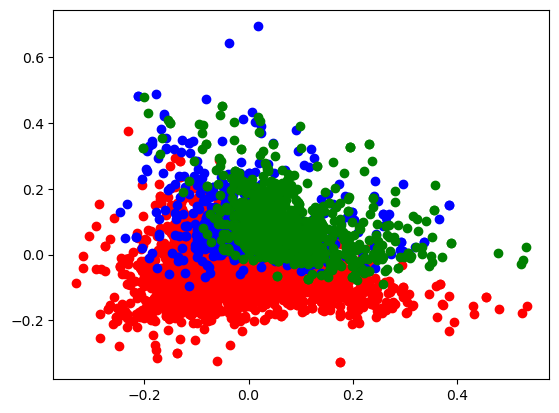

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Join the words in each document into a single string
doc_clean_joined = [' '.join(doc) for doc in doc_clean]

# Vectorize the reviews
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(doc_clean_joined)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Assuming you want to cluster into 3 groups
kmeans.fit(X)

# Visualize the clusters
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())

colors = ["r", "b", "g"]

for i in range(3):  # Assuming you want to cluster into 3 groups
    plt.scatter(scatter_plot_points[kmeans.labels_ == i, 0], scatter_plot_points[kmeans.labels_ == i, 1], color=colors[i])

plt.show()


In [100]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sentiment         4000 non-null   int64  
 1   Processed_Review  4000 non-null   object 
 2   sentiment_score   4000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 125.0+ KB


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming that `data3` is your DataFrame and `Processed_Review` and `sentiment` are your columns
X_train, X_test, y_train, y_test = train_test_split(data3['Processed_Review'], data3['sentiment'], test_size=0.2, random_state=42)

# Create a pipeline that first transforms the data using TfidfVectorizer and then fits it using Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear')),
])

# Train the model
pipeline.fit(X_train, y_train)

# Test the model
predictions = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test, predictions))

# Print the accuracy score
print("Accuracy: ", accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.94      1.00      0.97       751
           2       0.00      0.00      0.00        36

    accuracy                           0.94       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.88      0.94      0.91       800

Accuracy:  0.93875


C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
